# The California housing dataset

## Predicting house prices

In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
import seaborn as sns
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.dummy import DummyRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFECV as RFECV
from sklearn.metrics import make_scorer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K
from keras import optimizers
from sklearn import metrics
import tensorflow as tf
import autokeras

# Loading Data

In [3]:
housing = fetch_california_housing()

In [4]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [5]:
df = pd.DataFrame(data=housing.data, columns=housing.feature_names)

In [6]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [7]:
df.insert(0, "MedHouseVal", housing.target)

In [8]:
df

,MedHouseVal,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,4.526,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,3.585,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,3.521,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,3.413,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.422,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...,...
20635,0.781,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,0.771,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,0.923,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,0.847,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


# Check for NaN values

In [9]:
df.isnull().sum()

MedHouseVal    0
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
dtype: int64

# Split Train , test

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train_data,test_data = train_test_split(df,test_size=0.3,random_state=0)

In [12]:
len(train_data)

14448

In [13]:
len(test_data)

6192

# Exploratory Data Aanalysis
## Distributions

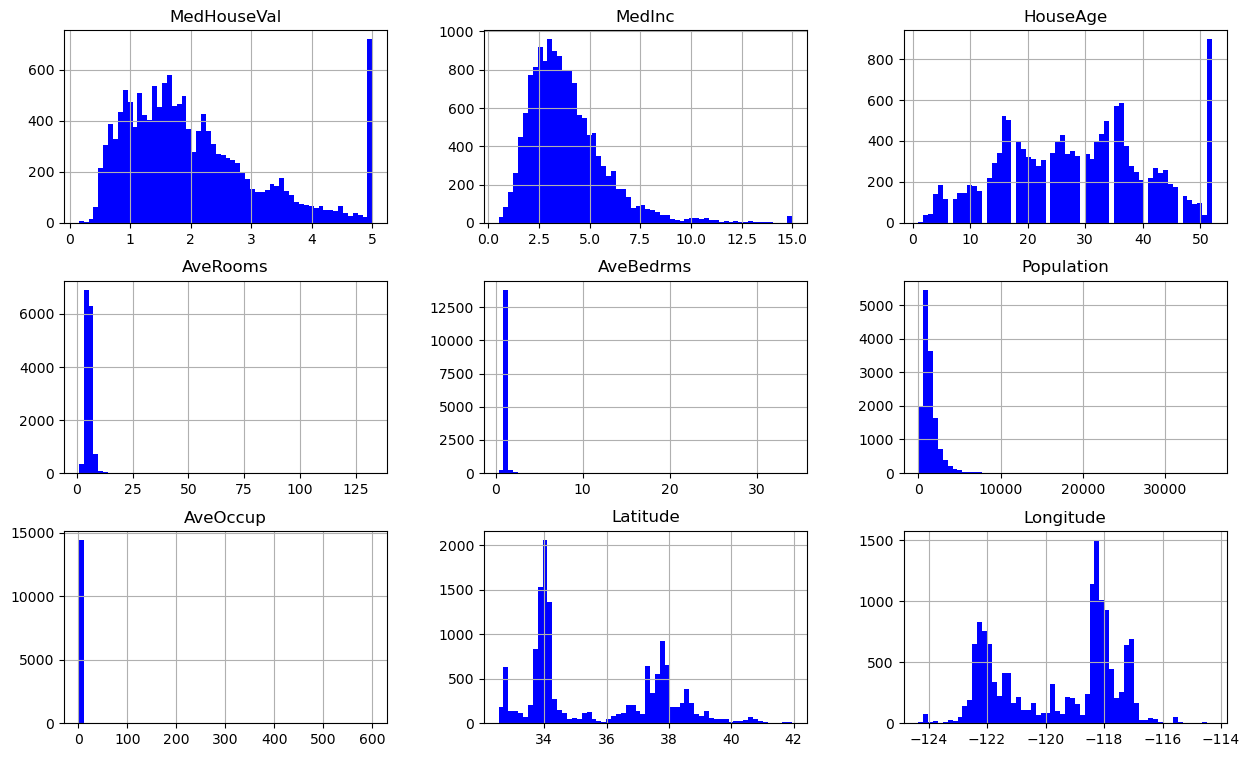

In [13]:
train_data.hist(bins=60, figsize=(15,9),color="blue");plt.show()

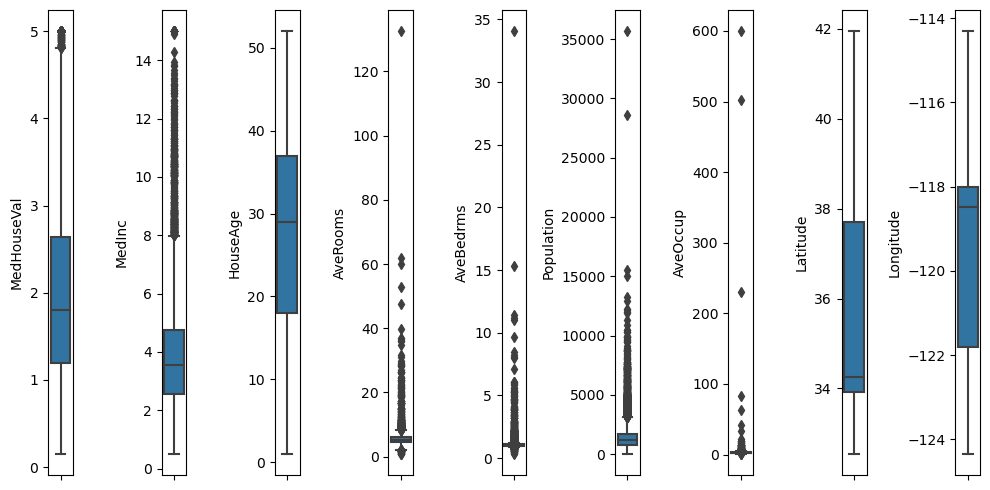

In [15]:
nrows = 1
ncols = 9
fig,ax=plt.subplots(ncols=ncols,nrows=nrows,figsize=(10,5))
i=0

for column in train_data.columns:

    sns.boxplot(data=train_data,y=column,ax=ax[i])#ax=ax[i//ncols,i%ncols])
    i=i+1
    
plt.tight_layout()

Odd Patterns:
* House_median_age is one possible feature with outliers. One local peak at the maximum value stands out. 
* Feature Median_house_value has an odd peak at its maximum value (around 500k), which could be an outlier.
* 5 features (Median Income, Average Rooms, Average Bedrooms, Population and Average Occupation are skewed which should be transformed towards a nomral distribution.
* The range of the x axis for some of these features is quite broad (eg. population), indicating we have quite a few outliers, but transformation may fix it.
* Population, Average bedrooms and Average rooms represent somewhat connected things and also have similar distributions. 

## Correlations

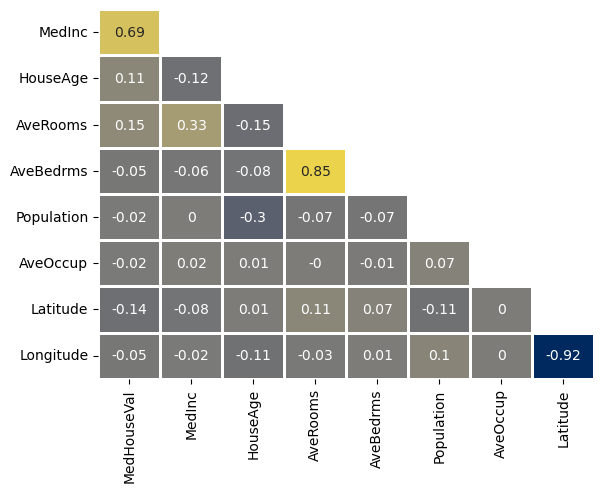

In [70]:
corr_mat = df.corr().round(2)
mask = np.triu(np.ones_like(corr_mat))
mask = mask[1:,:-1]
corr_mat = corr_mat.iloc[1:,:-1].copy()
sns.heatmap(corr_mat, mask=mask, vmin=-1,vmax=1,center=0, 
                cmap='cividis',square=False,lw=2,annot=True,cbar=False)
plt.show() 

* Target variable median_house_value is highly correlated to median_income, so one might outline this as an important feature.
* average bedrooms and average rooms highly correlate. One of the features could be dropped since no additional information is given by a second feature.
* Population and and average occupation could be dropped for simple models, since they barely correlate in a linear way

## Pair plots
* Looking for irregular two feature patterns or outliers ( multiple features give a clearer picture of outlier )
* Two feature linear correlation value visualisation in two dimensional space ( is the data sorted linearly or completly 
random )
* Two dimensional Data clusters (using KDE approximation)

In [71]:
#Draw a Bivariate Seaborn Pairgrid and KDE density
def snsPairGrid(df):
    g = sns.PairGrid(df,diag_sharey=False)
    g.fig.set_size_inches(14,13)
    g.map_lower(sns.scatterplot, alpha=0.4) # scattered plot on lower half
    g.map_diag(sns.kdeplot) # draw kde approximation on the diagonal
    g.map_lower(sns.kdeplot,cmap='plasma',n_levels=10)
    plt.tight_layout()

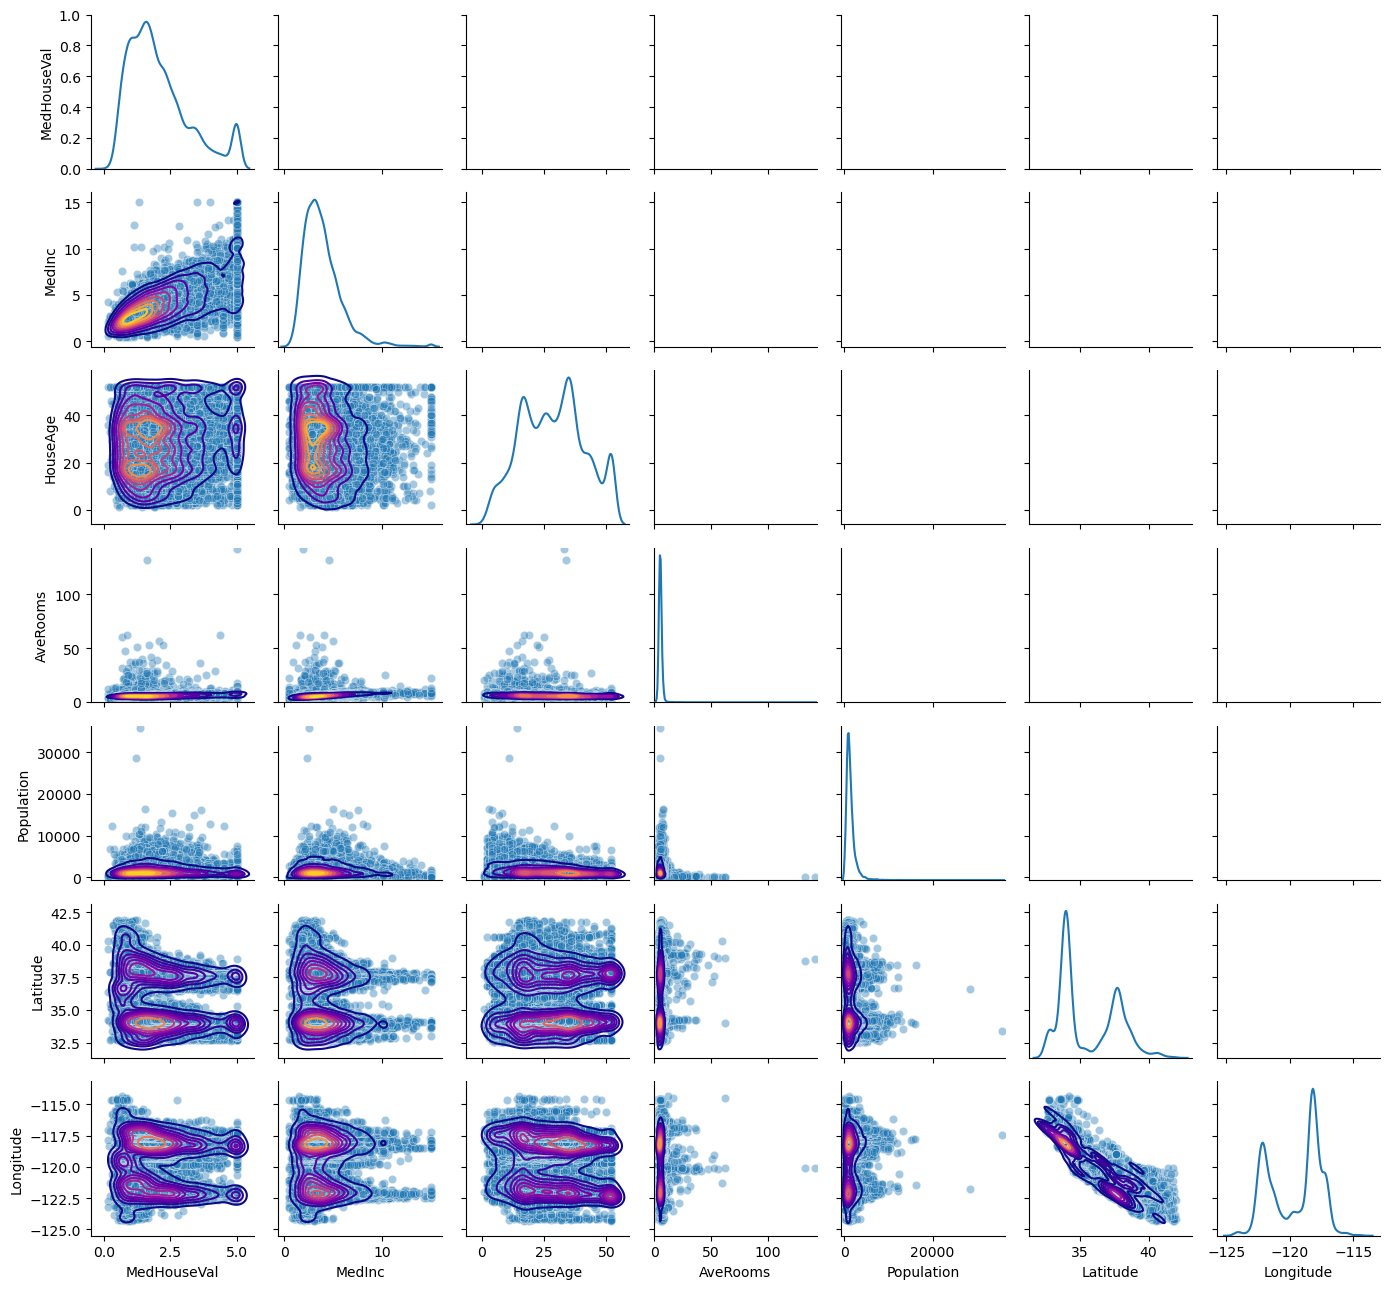

In [19]:
snsPairGrid(df.drop(["AveBedrms","AveOccup"], axis="columns"))

* median_income seems to be linear related to median_house_value. However the median_house_value seems to be clipped at 5. 


* median_house_age vs median_house_value relation, looks like it is completely spread out all over the place.


* average rooms and population seem to be more complex to model. Looking at the Kernel Density Estimate it's heavily concentrated at lower values for the two, with a fair bit at larger values & a lot of data outside the main clusters, classifiable as outliers.


* many features have different axis, so scaling should be considered, so that higher values are not inerpreted as more important 

## Geospatial data

In [14]:
# defining a simple plot function, input list containing features of names found in dataframe
def plotThree(df,feature_list):
    
    # load california from module, common for all plots
    cali = gpd.read_file(gplt.datasets.get_path('california_congressional_districts'))
    cali = cali.assign(area=cali.geometry.area)
    
    # Create a geopandas geometry feature; input dataframe should contain .longtitude, .latitude
    gdf = gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df.Longitude,df.Latitude))
    proj=gcrs.AlbersEqualArea(central_latitude=37.16611, central_longitude=-119.44944) # related to view

    fig,ax = plt.subplots(1,3,figsize=(21,6),subplot_kw={'projection': proj})
    for i, feature in enumerate(feature_list):
        
        tgdf = gdf.sort_values(by=feature,ascending=True) 
        gplt.polyplot(cali,projection=proj,ax=ax[i]) # the module already has california
        gplt.pointplot(tgdf,ax=ax[i],hue=feature,cmap='plasma',legend=True,alpha=1.0,s=3)
        ax[i].set_title(feature)

    plt.tight_layout()
    plt.subplots_adjust(wspace=-0.5)
    del df['geometry'] 

/tmp/ipykernel_3951042/2967221090.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cali = cali.assign(area=cali.geometry.area)


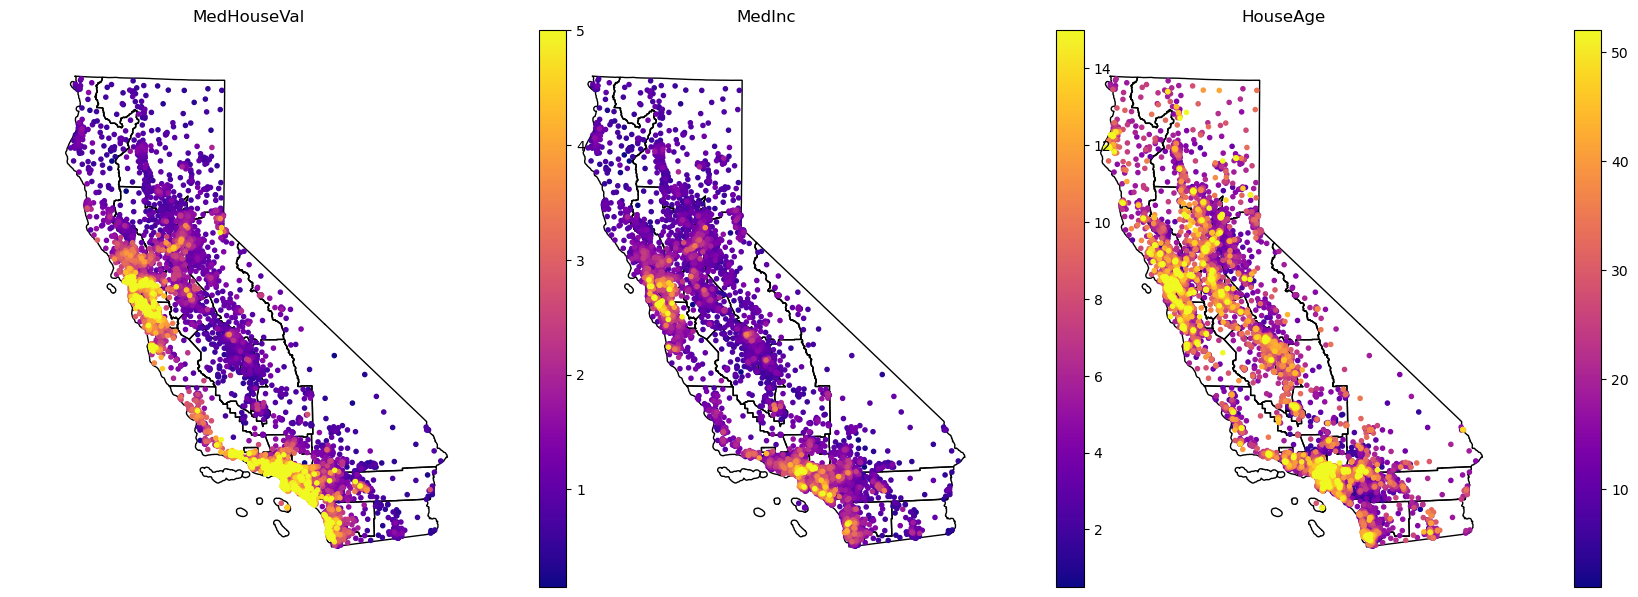

In [15]:
plotThree(df,['MedHouseVal','MedInc','HouseAge'])

* median_house_value and median_income correlate and tend to be higher closer to the coast
* houses closer to the coast seem to be older as well

# Removing Outliers
We will remove outliers in the training data but kep it in a seperate dataframe to test with and without outliers.

First lets remove odd high values for average_rooms, average_bedrooms, population and average occupation

In [16]:
train_data_outliers_rmvd = train_data.copy()
train_data_outliers_rmvd.sort_values('AveRooms', ascending=False)[:5]

,MedHouseVal,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
1979,1.625,4.6250,34.0,132.533333,34.066667,36.0,2.400000,38.80,-120.08
1913,4.375,4.0714,19.0,61.812500,11.000000,112.0,2.333333,39.01,-120.06
11862,0.675,2.6250,25.0,59.875000,15.312500,28.0,1.750000,40.27,-121.25
9676,2.214,3.2431,14.0,52.848214,11.410714,265.0,2.366071,37.64,-119.02
1240,0.775,3.1250,11.0,47.515152,11.181818,82.0,2.484848,38.42,-120.19


In [17]:
train_data_outliers_rmvd = train_data_outliers_rmvd.drop(1979)

In [18]:
train_data_outliers_rmvd.sort_values('AveBedrms', ascending=False)[:5]

,MedHouseVal,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
11862,0.675,2.6250,25.0,59.875000,15.312500,28.0,1.750000,40.27,-121.25
9676,2.214,3.2431,14.0,52.848214,11.410714,265.0,2.366071,37.64,-119.02
1240,0.775,3.1250,11.0,47.515152,11.181818,82.0,2.484848,38.42,-120.19
1913,4.375,4.0714,19.0,61.812500,11.000000,112.0,2.333333,39.01,-120.06
1102,0.675,2.4028,17.0,31.777778,9.703704,47.0,1.740741,40.06,-121.54


* already removed

In [19]:
train_data_outliers_rmvd.sort_values('Population', ascending=False)[:5]

,MedHouseVal,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
15360,1.344,2.5729,14.0,5.270497,1.010484,35682.0,7.482072,33.35,-117.42
9880,1.188,2.3087,11.0,5.364518,1.059684,28566.0,4.696810,36.64,-121.79
6057,2.539,6.0191,8.0,6.347327,1.047525,15507.0,3.070693,34.03,-117.78
6066,3.397,6.6288,7.0,6.802554,1.026277,15037.0,3.692780,34.04,-117.87
12215,2.123,4.5841,4.0,7.006453,1.142429,13251.0,3.053929,33.52,-117.12


In [20]:
train_data_outliers_rmvd = train_data_outliers_rmvd.drop([15360, 9880])

In [21]:
train_data_outliers_rmvd.sort_values('AveOccup', ascending=False)[:5]

,MedHouseVal,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
3364,0.675,5.5179,36.0,5.142857,1.142857,4198.0,599.714286,40.41,-120.51
16669,3.500,4.2639,46.0,9.076923,1.307692,6532.0,502.461538,35.32,-120.70
13034,2.250,6.1359,52.0,8.275862,1.517241,6675.0,230.172414,38.69,-121.15
9172,1.546,4.2391,5.0,5.123810,0.933333,8733.0,83.171429,34.47,-118.59
12104,1.625,1.6250,8.0,7.600000,0.950000,1275.0,63.750000,33.97,-117.33


In [22]:
train_data_outliers_rmvd = train_data_outliers_rmvd.drop([3364, 16669])

As the distributions and pariplots have shown, it is quite likely that the features MedInc, HouseAge and MedHouseVal are clipped at a maximum, which does not represent real data. Lets remove them.

In [23]:
train_data_outliers_rmvd.sort_values('MedInc', ascending=False)[:5]

,MedHouseVal,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
6590,5.00001,15.0001,48.0,8.845161,1.058065,528.0,3.406452,34.19,-118.18
17858,5.00001,15.0001,43.0,5.687500,0.750000,58.0,3.625000,37.46,-121.87
6399,5.00001,15.0001,35.0,8.586207,1.068966,268.0,9.241379,34.13,-118.04
6592,5.00001,15.0001,38.0,8.954733,1.094650,798.0,3.283951,34.19,-118.20
1566,3.50000,15.0001,2.0,22.222222,2.222222,25.0,2.777778,37.74,-121.96


In [24]:
train_data_outliers_rmvd = train_data_outliers_rmvd[train_data_outliers_rmvd['MedInc'] < 15.0001]

In [25]:
train_data_outliers_rmvd.sort_values('HouseAge', ascending=False)[:5]

,MedHouseVal,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
1989,0.475,1.9750,52.0,2.800000,0.700000,193.0,4.825000,36.73,-119.79
4,3.422,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
253,0.888,2.6765,52.0,5.000000,1.026846,473.0,3.174497,37.77,-122.21
4556,3.500,0.6775,52.0,1.748287,1.211215,2232.0,1.390654,34.05,-118.25
4321,3.957,3.8472,52.0,4.916667,0.980392,514.0,2.519608,34.08,-118.35


In [26]:
train_data_outliers_rmvd = train_data_outliers_rmvd[train_data_outliers_rmvd['HouseAge'] < 52.0]

In [27]:
train_data_outliers_rmvd.sort_values('MedHouseVal', ascending=False)[:5]

,MedHouseVal,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
16161,5.00001,4.2414,49.0,4.857143,0.984375,1040.0,2.321429,37.78,-122.49
20367,5.00001,8.0428,3.0,8.239437,1.042254,493.0,3.471831,34.16,-118.94
923,5.00001,9.7194,9.0,8.306261,0.976311,1981.0,3.351946,37.49,-121.89
14810,5.00001,5.3177,40.0,7.075949,1.047468,767.0,2.427215,32.69,-117.17
8815,5.00001,9.2670,33.0,7.741602,1.028424,1048.0,2.708010,33.75,-118.32


In [28]:
train_data_outliers_rmvd = train_data_outliers_rmvd[train_data_outliers_rmvd['MedHouseVal'] < 5.00001]

Lets multiply MedHouseVal by 100.000 to get the actual value in $.

In [29]:
train_data['MedHouseVal'] *= 100000
train_data_outliers_rmvd['MedHouseVal'] *= 100000
test_data['MedHouseVal'] *= 100000

Lets review, data without outliers.

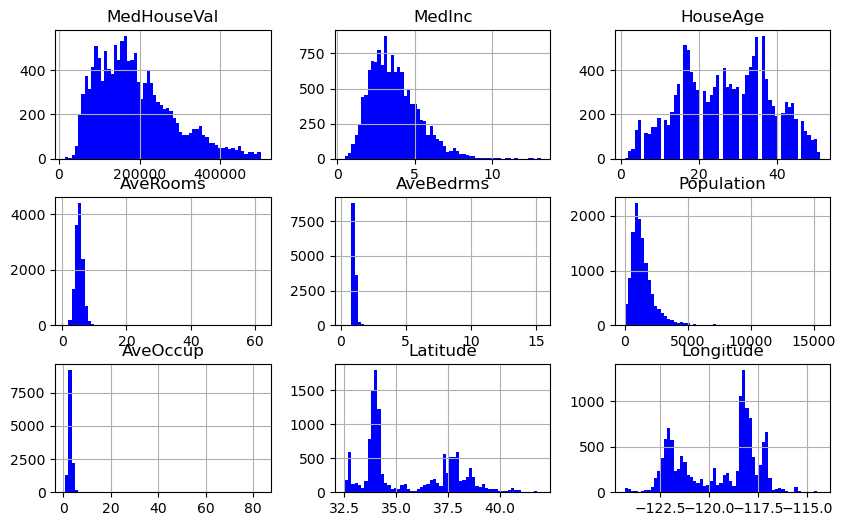

In [30]:
train_data_outliers_rmvd.hist(bins=60, figsize=(10,6),color="blue");plt.show()

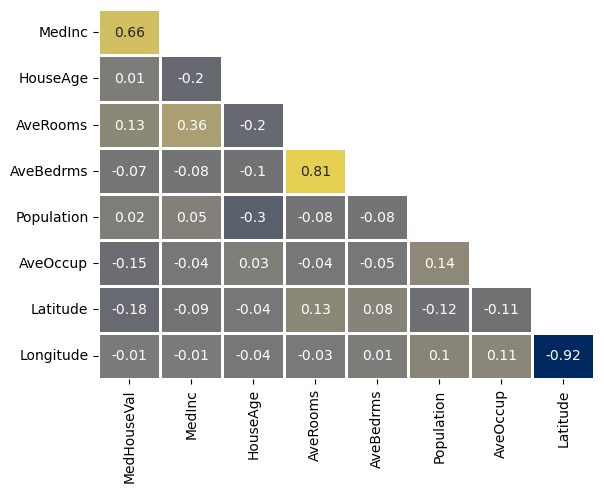

In [31]:
corr_mat = train_data_outliers_rmvd.corr().round(2)
mask = np.triu(np.ones_like(corr_mat))
mask = mask[1:,:-1]
corr_mat = corr_mat.iloc[1:,:-1].copy()
sns.heatmap(corr_mat, mask=mask, vmin=-1,vmax=1,center=0, 
                cmap='cividis',square=False,lw=2,annot=True,cbar=False)
plt.show() 

# Feature Engineering
We have seen that the AveRooms heavily correlates with AveBedrms. Lets combine them by using their ratio as both of the single features wont provide useful information and only extend computing time for models.

In [32]:
train_data['bed_per_room'] = train_data['AveBedrms']/train_data['AveRooms']
train_data_outliers_rmvd['bed_per_room'] = train_data_outliers_rmvd['AveBedrms']/train_data_outliers_rmvd['AveRooms']
test_data['bed_per_room'] = test_data['AveBedrms']/test_data['AveRooms']

Additionaly lets combine both coordinates in a single feature as it represents the distance to the coast, which is an important factir as we have seen.

In [33]:
train_data['diag_coord'] = (train_data['Longitude'] + train_data['Latitude'])
train_data_outliers_rmvd['diag_coord'] = (train_data_outliers_rmvd['Longitude'] + train_data_outliers_rmvd['Latitude'])
test_data['diag_coord'] = (test_data['Longitude'] + test_data['Latitude'])

/tmp/ipykernel_3951042/2967221090.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cali = cali.assign(area=cali.geometry.area)


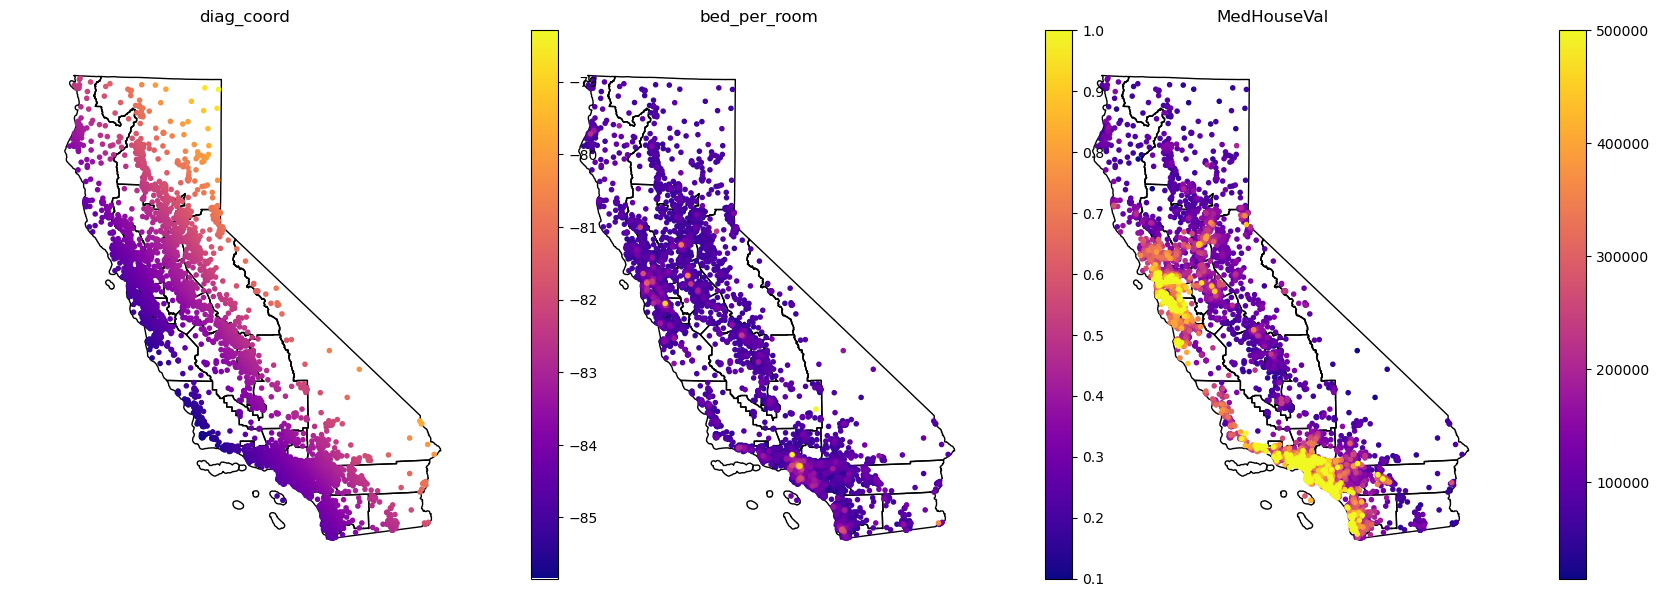

In [34]:
plotThree(train_data,['diag_coord','bed_per_room', 'MedHouseVal'])

# Modeling

Lets test different models on our data. As first lets test a dummy Regresor which uses the mean to predict the house value as a comparison. Given that we have many outliers, and some variables seems not be able to be linear related to our target variable, probably linear regression will not work that well. Gradient Boosting should do better or maybe even Random Forest due to the outliers. 

Lets write a function which enables us to evaluate different models with different options.

In [446]:
# Model Evaluation Function w/ Pipelines
def modelEval(train_data, test_data, feature='MedHouseVal', _model = 'dummy',scaling=False, polynomial_features=False, features="all", gridParams= False):
       
    y_train = train_data[feature].copy()
    y_test = test_data[feature].copy()
    
    if features == "all":
        X_train = train_data.copy()
        X_test = test_data.copy()
        del X_train[feature]     # remove target variable from train features
        del X_test[feature]     # remove target variable from test features
    else:
        X_train = train_data[features].copy()
        X_test = test_data[features].copy()
    
    # Pick Model 
    if(_model == 'dummy'):
        model = DummyRegressor()

    if(_model == 'random_forest'):
        model = RandomForestRegressor(random_state=0)

    if(_model == 'linear_regression'):
        model = LinearRegression()

    if(_model == 'svm'):
        model = SVR()
        
    if _model =="xgboost":
        model = GradientBoostingRegressor(random_state=0)

    steps = []
    if scaling:
        steps.append(('scaler',StandardScaler()))
    if polynomial_features:
        steps.append(('poly',PolynomialFeatures(polynomial_features)))
    steps.append(('model',model))
    pipeline = Pipeline(steps)
    
    if gridParams!= False:
        gscv = GridSearchCV(pipeline, gridParams,cv=5)
        gscv.fit(X_train,y_train)
        print (gscv.best_params_)
        y_test_pred = gscv.predict(X_test)
    else:
        pipeline.fit(X_train, y_train)
        y_test_pred = pipeline.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    result = {"rmse" : rmse, "model":_model, "scaling":scaling, "polynomial_features": polynomial_features}
    return result

#### DummyRegressor

In [447]:
modelEval(train_data, test_data, _model = 'dummy')

{'rmse': 115465.92040804864,
 'model': 'dummy',
 'scaling': False,
 'polynomial_features': False}

The dummy Regressor results in a root mean squared error of 116K. Any score higher than in other models should be viewed as obsolete. 

#### Linear Regression

In [448]:
modelEval(train_data, test_data, _model = 'linear_regression', scaling=False, polynomial_features=False)

{'rmse': 72648.98826841653,
 'model': 'linear_regression',
 'scaling': False,
 'polynomial_features': False}

In [449]:
modelEval(train_data_outliers_rmvd, test_data, _model = 'linear_regression', scaling=False, polynomial_features=False)

{'rmse': 163367.38080594453,
 'model': 'linear_regression',
 'scaling': False,
 'polynomial_features': False}

Linear Regression is better than thedummy regressor. Removing the outliers does not help. Lets see if we can improve the example by only using the three most linear correlating features: MedInc, diag_cord, bed_per_room

In [451]:
modelEval(train_data, test_data, _model = 'linear_regression', scaling=False, polynomial_features=False, features= ['MedInc', "bed_per_room", "diag_coord"])

{'rmse': 74426.87673228867,
 'model': 'linear_regression',
 'scaling': False,
 'polynomial_features': False}

The results is slghtly worse but it confirms these three features seem to be to most important ones. Lets see if we can improve even further with other models.

#### SVM

In [454]:
modelEval(train_data, test_data, _model = 'svm', scaling=True, polynomial_features=False)

{'rmse': 118136.8794803087,
 'model': 'svm',
 'scaling': True,
 'polynomial_features': False}

That didnt go to well. Lets search for better parameters.

In [455]:
# defining parameter range
param_grid = {'model__C': [0.1, 1, 10, 100, 1000], 
              'model__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'model__kernel': ['rbf']} 

  
modelEval(train_data, test_data, _model = 'svm', scaling=True, polynomial_features=False, gridParams=param_grid)

{'model__C': 1000, 'model__gamma': 0.1, 'model__kernel': 'rbf'}


{'rmse': 70268.69614178012,
 'model': 'svm',
 'scaling': True,
 'polynomial_features': False}

In [456]:
param_grid = {'model__C': [1000], 
              'model__gamma': [0.1],
              'model__kernel': ['rbf']} 

  
modelEval(train_data_outliers_rmvd, test_data, _model = 'svm', scaling=True, polynomial_features=False, gridParams=param_grid)

{'model__C': 1000, 'model__gamma': 0.1, 'model__kernel': 'rbf'}


{'rmse': 76438.82448534312,
 'model': 'svm',
 'scaling': True,
 'polynomial_features': False}

SVM further lowers the RMSE to 70K, also removing the outliers is not helping again.

#### Random Forest

In [457]:
modelEval(train_data, test_data, _model = 'random_forest')

{'rmse': 48600.98783322011,
 'model': 'random_forest',
 'scaling': False,
 'polynomial_features': False}

Random forest performs as expected even better with a 48K RMSE. XGBOOST should perform similiar. Lets check it.

#### XGBoost

In [459]:
modelEval(train_data, test_data, _model = 'xgboost', polynomial_features=False)

{'rmse': 51631.47314635003,
 'model': 'xgboost',
 'scaling': False,
 'polynomial_features': False}

In [460]:
modelEval(train_data, test_data, _model = 'xgboost', polynomial_features=2)

{'rmse': 51117.65315182282,
 'model': 'xgboost',
 'scaling': False,
 'polynomial_features': 2}

XGBoost does not exceed the random forest Regressor. This might be the cfase because we have quite some noise in our data. Random Forest seems to be the best approach for our problem to predict the House Value with a RMSE of 48K. Lets see if we can cut further features using recursive feature elemination.

In [233]:
y_train = train_data['MedHouseVal'].copy()
X_train = train_data.copy()
del X_train['MedHouseVal']

model = RandomForestRegressor(random_state=0)
selector = RFECV(model, step=1, cv=3, scoring = "neg_root_mean_squared_error")
selector.fit(X_train, y_train)

RFECV(cv=3, estimator=RandomForestRegressor(random_state=0),
      scoring='neg_root_mean_squared_error')

In [234]:
selector.n_features_

7

In [235]:
selector.n_features_in_

10

In [245]:
selector.feature_names_in_[~selector.support_]

array(['AveRooms', 'AveBedrms', 'Population'], dtype=object)

C:\Users\johan\.conda\envs\california_housing\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


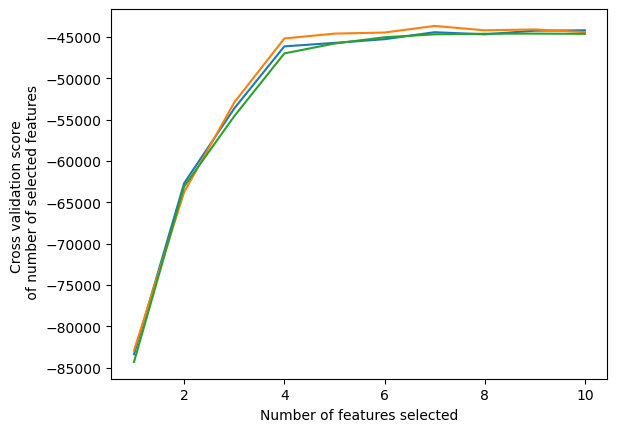

In [236]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score \n of number of selected features")
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.show()

As we can see its useful to more features than less. Optimally one would use 7 out of ten and AveRooms', 'AveBedrms', 'Population' could be left out, however using all ten features only gradually leads to worse results.

#### TPOT
Let us see if we have overlooked something simple by using an auoML method called TeaPot(TPOT).

In [43]:
from tpot import TPOTRegressor
#data
y_train = train_data['MedHouseVal'].copy()
X_train = train_data.copy()
del X_train['MedHouseVal']

# Make a custom metric function
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Make a custom a scorer from the custom metric function
# Note: greater_is_better=False in make_scorer below would mean that the scoring function should be minimized.
rmse_scorer = make_scorer(rmse, greater_is_better=False)

tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42, scoring=rmse_scorer)
tpot.fit(X_train, y_train)


ModuleNotFoundError: No module named 'tpot'

Generation 1 - Current best internal CV score: -43591.936073698904

Generation 2 - Current best internal CV score: -43591.936073698904

Generation 3 - Current best internal CV score: -42285.47716688031

Generation 4 - Current best internal CV score: -42285.47716688031

Generation 5 - Current best internal CV score: -42285.47716688031

Best pipeline: RandomForestRegressor(ExtraTreesRegressor(input_matrix, bootstrap=False, max_features=0.8, min_samples_leaf=5, min_samples_split=17, n_estimators=100), bootstrap=False, max_features=0.45, min_samples_leaf=11, min_samples_split=5, n_estimators=100)

In [189]:
#data
y_test = test_data['MedHouseVal'].copy()
X_test = test_data.copy()
del X_test['MedHouseVal']

In [190]:
print(tpot.score(X_test, y_test))
tpot.export('tpot_cali_pipeline.py')

-48981.29127122911


C:\Users\johan\.conda\envs\california_housing\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


TPOT confirms a RandomForestRegressor seems to be the best approach. To be specific it suggests a ExtraTreesRegressor (Extremely Randomized Trees), which:
- samples data to build random trees WITHOUT replacement
- nodes are split based on random splits rather than on best splits
    
So it maybe worse when there is a high number of features, but it can be faster!

### Deep Learning
Lets see how far we can get with deep learning compared to conventional methods!

In [2]:
# having 10 neuron is based on the number of available features
model = Sequential()
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(1))

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

optimizer = optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer,loss=root_mean_squared_error)

2022-12-19 11:44:20.015512: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-19 11:44:20.669223: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 46698 MB memory:  -> device: 0, name: RTX A6000, pci bus id: 0000:05:00.0, compute capability: 8.6


In [35]:
#dont forget normalizing for deep learning
#we use the distribution of the train data to fit the normalizer

#we use two scalers - one for features, one for the target, so we can inverse transform later on easier. Each column is scaled independently anyway.
#FIT SCALERS
train_features = train_data.copy()
del train_features["MedHouseVal"]
feature_scaler = StandardScaler()
feature_scaler = feature_scaler.fit(train_features)

train_targets = train_data.copy()["MedHouseVal"].values.reshape(-1, 1)
target_scaler = StandardScaler()
target_scaler = target_scaler.fit(train_targets)

#TRANSFORM DATA USING SCLAERS
#train data
X_train = feature_scaler.transform(train_features)
y_train = target_scaler.transform(train_targets)

#test data
test_features = test_data.copy()
del test_features["MedHouseVal"]
X_test = feature_scaler.transform(test_features)
y_test = target_scaler.transform(test_data.copy()["MedHouseVal"].values.reshape(-1, 1))

2022-12-06 11:15:57.808161: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


194/194 [==============================] - 0s 1ms/step
RMSE: 53144.58168354289


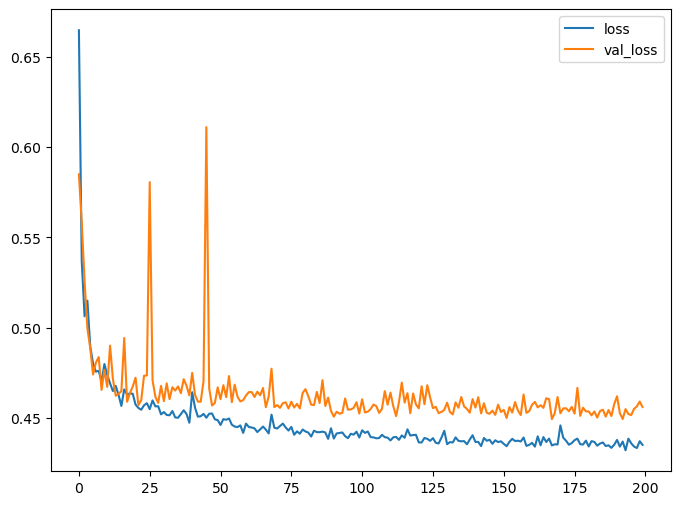

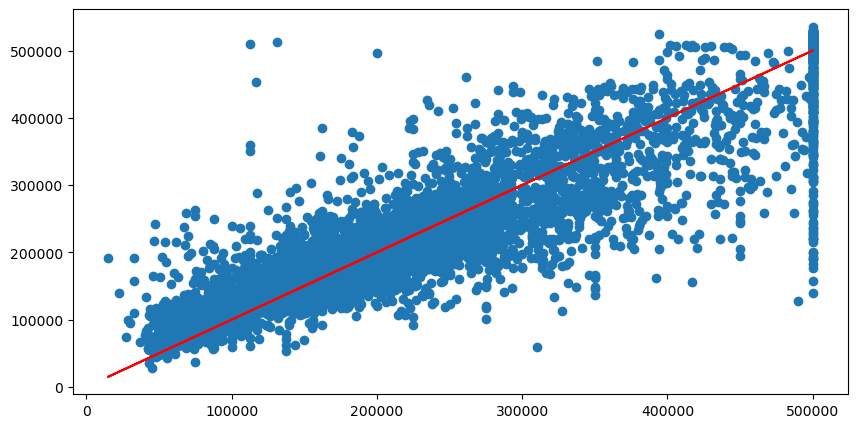

In [41]:
#TRAIN
model.fit(x=X_train,y=y_train,
      validation_data=(X_test,y_test),
      batch_size=128,epochs=200, verbose= 0)
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(8,6))

#EVAL
y_pred = model.predict(X_test)
print('RMSE:', np.sqrt(metrics.mean_squared_error(target_scaler.inverse_transform(y_test), target_scaler.inverse_transform(y_pred))))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(target_scaler.inverse_transform(y_test),target_scaler.inverse_transform(y_pred))
# Perfect predictions
plt.plot(target_scaler.inverse_transform(y_test),target_scaler.inverse_transform(y_test),'r')

We can reach an RMSE of 53K, however to compete with the Extremely randomized tree setup suggested by TPOT (48K RMSE), more hyperparameter searching is necessary.

In [37]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [54]:
automodel = autokeras.StructuredDataRegressor(
    column_names=None,
    column_types=None,
    output_dim=None,
    loss='mean_squared_error',
    metrics=None,
    project_name="structured_data_regressor",
    max_trials=50,
    directory=None,
    objective="val_loss",
    tuner=None,
    overwrite=True,
    seed=None,
    max_model_size=None,
)

In [55]:
automodel.fit(x=X_train, y=y_train, epochs=100, validation_data=[X_test,y_test])

Trial 50 Complete [00h 01m 36s]
val_loss: 0.2093529850244522

Best val_loss So Far: 0.19793720543384552
Total elapsed time: 01h 11m 39s
INFO:tensorflow:Oracle triggered exit
Epoch 1/100
452/452 [==============================] - 2s 4ms/step - loss: 0.5754 - mean_squared_error: 0.5754 - val_loss: 0.7023 - val_mean_squared_error: 0.7023
Epoch 2/100
452/452 [==============================] - 2s 4ms/step - loss: 0.4943 - mean_squared_error: 0.4943 - val_loss: 1.0441 - val_mean_squared_error: 1.0441
Epoch 3/100
452/452 [==============================] - 2s 4ms/step - loss: 0.3835 - mean_squared_error: 0.3835 - val_loss: 0.3176 - val_mean_squared_error: 0.3176
Epoch 4/100
452/452 [==============================] - 2s 4ms/step - loss: 0.2899 - mean_squared_error: 0.2899 - val_loss: 0.3309 - val_mean_squared_error: 0.3309
Epoch 5/100
452/452 [==============================] - 2s 4ms/step - loss: 0.2954 - mean_squared_error: 0.2954 - val_loss: 0.2650 - val_mean_squared_error: 0.2650
Epoch 6/100

In [57]:
best_model = automodel.export_model()

In [59]:
best_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 multi_category_encoding (Mu  (None, 10)               0         
 ltiCategoryEncoding)                                            
                                                                 
 normalization (Normalizatio  (None, 10)               21        
 n)                                                              
                                                                 
 dense (Dense)               (None, 512)               5632      
                                                                 
 re_lu (ReLU)                (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 1024)              525312

In [60]:
best_model.save("best_model_autokeras", save_format="tf")

INFO:tensorflow:Assets written to: best_model_autokeras/assets


In [36]:
best_model = tf.keras.models.load_model('best_model_autokeras')

2022-12-19 16:57:26.193511: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-19 16:57:26.858015: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 46694 MB memory:  -> device: 0, name: RTX A6000, pci bus id: 0000:05:00.0, compute capability: 8.6


 81/194 [===========>..................] - ETA: 0s

2022-12-19 16:57:46.548933: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


194/194 [==============================] - 2s 2ms/step
RMSE: 51715.87228648392


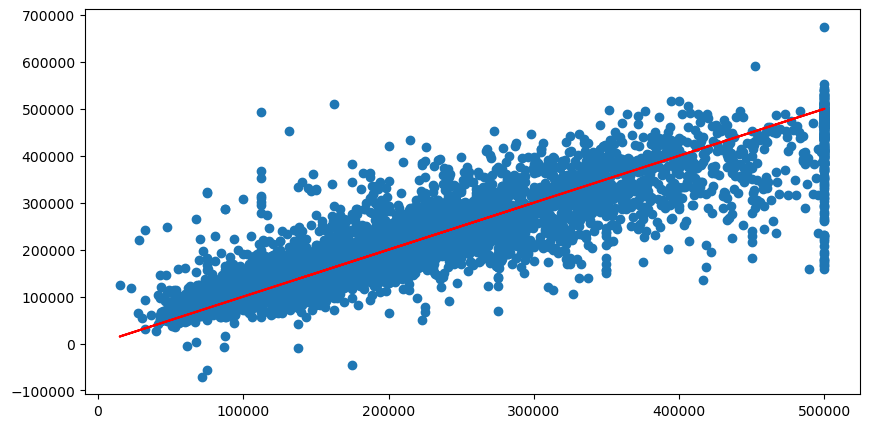

In [38]:
#EVAL
y_pred = best_model.predict(X_test, batch_size=32, verbose=1)
print('RMSE:', np.sqrt(metrics.mean_squared_error(target_scaler.inverse_transform(y_test), target_scaler.inverse_transform(y_pred))))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(target_scaler.inverse_transform(y_test),target_scaler.inverse_transform(y_pred))
# Perfect predictions
plt.plot(target_scaler.inverse_transform(y_test),target_scaler.inverse_transform(y_test),'r')

Automatically finding a good architecture using AutoKeras decreases the RMSE from 53K to 51K. 

452/452 [==============================] - 1s 2ms/step
RMSE: 33796.47616297705


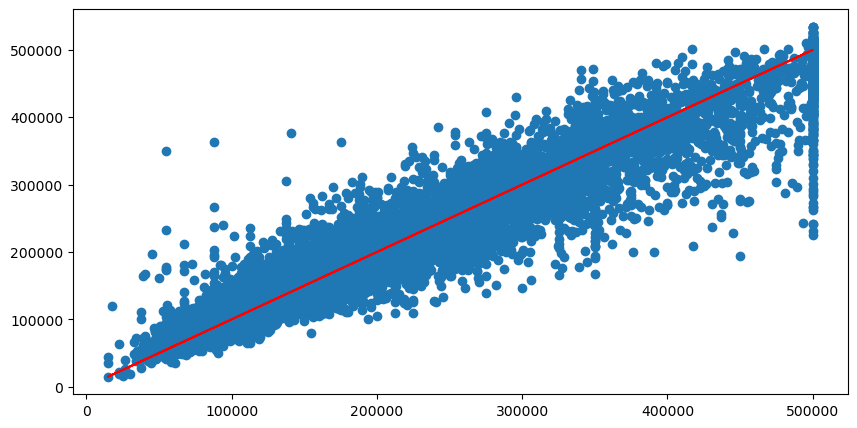

In [42]:
#EVAL
y_pred = best_model.predict(X_train, batch_size=32, verbose=1)
print('RMSE:', np.sqrt(metrics.mean_squared_error(target_scaler.inverse_transform(y_train), target_scaler.inverse_transform(y_pred))))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(target_scaler.inverse_transform(y_train),target_scaler.inverse_transform(y_pred))
# Perfect predictions
plt.plot(target_scaler.inverse_transform(y_train),target_scaler.inverse_transform(y_train),'r')

We can see the RMSE on the traning data (33K) differs a lot from the RMSE on the test data (51K). To prevent overfitting one could try to decrease the model size, add more dropout, decrease batchsize or stop the training earlier. 